<a href="https://colab.research.google.com/github/tlerksuthirat/CCA_parp_atr/blob/main/Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!wget -O scopus.csv https://raw.githubusercontent.com/tlerksuthirat/sample-dataset/master/scopus.csv

--2023-04-13 13:35:11--  https://raw.githubusercontent.com/tlerksuthirat/sample-dataset/master/scopus.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2589934 (2.5M) [text/plain]
Saving to: ‘scopus.csv’

scopus.csv          100%[===================>]   2.47M  --.-KB/s    in 0.06s   

2023-04-13 13:35:11 (38.0 MB/s) - ‘scopus.csv’ saved [2589934/2589934]



In [1]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import os
import pandas as pd
import nltk

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
from nltk.corpus import stopwords
# Load the stop words
comm_words = set(stopwords.words('english'))

In [ ]:
comm_words.update(additional_stopwords)
print(comm_words)

In [5]:
df = pd.read_csv('/content/scopus.csv')

In [7]:
col = df.columns
len = df.shape
print(f"column name = {col}\nno. row = {len}")

column name = Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Document Type',
       'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')
no. row = (791, 24)


In [8]:
df.head(3)

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,Affiliations,Authors with affiliations,Abstract,Author Keywords,Index Keywords,Document Type,Publication Stage,Open Access,Source,EID
0,"Petroff R.L., Cavalcante R.G., Langen E.S., Do...",57195575027;56355138100;8611236300;6507741630;...,Mediation effects of DNA methylation and hydro...,2023,Clinical Epigenetics,15,1,49,NaN,NaN,...,"Department of Environmental Health Sciences, S...","Petroff, R.L., Department of Environmental Hea...",Background: Per- and polyfluoroalkyl substance...,Children’s health; Developmental origins of he...,fluorocarbon; hydrogen sulfite; perfluoroundec...,Article,Final,NaN,Scopus,2-s2.0-85150965292
1,"Zisopoulou T., Varvogli L.",58123768300;17836888600;,Stress Management Methods in Children and Adol...,2023,Hormone Research in Paediatrics,96,1,NaN,97,107,...,Stress Science and Health Promotion Post Gradu...,"Zisopoulou, T., Stress Science and Health Prom...",Background: Stress is a natural automatic reac...,Relaxation techniques; Stress management; Stre...,abdominal pain; anesthesia induction; anxiety ...,Review,Final,NaN,Scopus,2-s2.0-85149179052
2,"Behera P., Satpathy I., Patnaik B.C.M.",57605391000;56381528100;56381086800;,Assessing Mental Health of Women Working as Fr...,2023,Journal of Medicinal and Chemical Sciences,6,3,NaN,506,514,...,"School of Management, KIIT University, Bhubane...","Behera, P., School of Management, KIIT Univers...",COVID-19 pandemic has taken a toll on the ment...,Anxiety; COVID-19 Pandemic; Depression; Mental...,NaN,Article,Final,NaN,Scopus,2-s2.0-85141990090


In [9]:
text1 = ''.join(df['Abstract'])

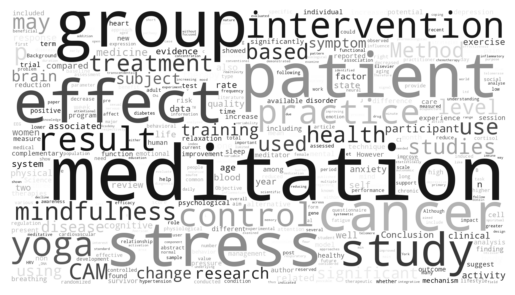

In [12]:
wordcloud1_EN = WordCloud(stopwords=comm_words, background_color="white",width=1800, height=1000,max_words=400,collocations=False,
                      relative_scaling = 0.4, colormap = "gray", prefer_horizontal =1,random_state = 42).generate(text1)

plt.imshow(wordcloud1_EN, interpolation='bilinear')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.savefig('abstract.png', dpi=300, format='png', bbox_inches='tight')
plt.axis("off")
plt.show()

In [13]:
word_freq1_EN = pd.DataFrame.from_dict(wordcloud1_EN.words_, orient='index',columns=['frequency']) 

In [14]:
word_freq1_EN.to_csv('word_freq.csv', index=True)

In [16]:
# Define the additional stopwords
additional_stopwords = ['meditation', 'result']
comm_words.update(additional_stopwords)
print(comm_words)

{'than', 'yourselves', 'was', "you'll", 'be', 'few', 's', 'below', 'further', 'our', "aren't", 'this', 'into', 'out', 'now', 'you', "needn't", 'yours', "don't", 'it', 'once', 'same', 'or', 'where', 'its', 'in', 'what', 'up', 'i', 'both', 'm', "hasn't", 'needn', 'isn', 'my', "you've", 'after', 'and', 'why', 'off', 'result', "shouldn't", "that'll", 'me', "you'd", 'meditation', "wasn't", 'other', 'because', 'nor', 'mightn', 'ours', "should've", "it's", 'have', "weren't", 'y', 'how', 'did', 'of', 'a', "mightn't", 'by', 'own', 'but', 'not', 'ourselves', 'itself', 'such', "hadn't", "haven't", 'only', 'are', 'the', "won't", 'wouldn', 'theirs', 'through', 'doing', 'hers', 'him', "she's", 'an', 'them', 'over', 'no', 'having', 'should', 'they', 'to', 'too', 'aren', 'ma', 're', 't', 'shouldn', 'we', "isn't", 'don', 'doesn', 'as', 'there', 'her', 'while', 'being', 'haven', 'before', 'very', 'who', 'shan', 'had', 'against', 'again', 'just', 'will', 'all', 'll', 'any', 'do', 'd', 'whom', 'hasn', "wo

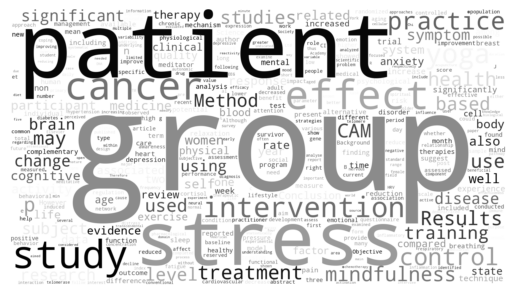

In [17]:
wordcloud2_EN = WordCloud(stopwords=comm_words, background_color="white",width=1800, height=1000,max_words=400,collocations=False,
                      relative_scaling = 0.4, colormap = "gray", prefer_horizontal =1,random_state = 42).generate(text1)

plt.imshow(wordcloud2_EN, interpolation='bilinear')
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.savefig('abstract2.png', dpi=300, format='png', bbox_inches='tight')
plt.axis("off")
plt.show()